In [54]:
import os
from datetime import datetime 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from pandas_profiling  import ProfileReport# ANALYIZING THE DATASET USING  PANDAS_PROFILING


In [55]:
# ANALYIZING THE DATASET USING  PANDAS_PROFILING
df = pd.read_csv(r"C:\Users\RAKSHA\Desktop\data\condition\condition_1.csv")
profile = ProfileReport(df)
profile.to_file(output_file=r"C:\Users\RAKSHA\Desktop\data\condition\condition_1.csv")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\RAKSHA\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
C:\Users\RAKSHA\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\RAKSHA\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_profiling\profile_report.py:282: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
# ANALYIZING THE DATASET USING  PANDAS_PROFILING
df = pd.read_csv(r"C:\Users\RAKSHA\Desktop\data\control\control_1.csv")
profile = ProfileReport(df)
profile.to_file(output_file=r"C:\Users\RAKSHA\Desktop\data\control\control_1.csv")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\RAKSHA\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
C:\Users\RAKSHA\AppData\Local\Programs\Python\Python310\lib\site-packages\multimethod\__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\RAKSHA\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_profiling\profile_report.py:282: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [57]:
condition_1 = pd.read_csv(r'C:\Users\RAKSHA\Desktop\data\condition\condition_1.csv')
control_1 = pd.read_csv(r'C:\Users\RAKSHA\Desktop\data\control\control_1.csv')
print(f'control_1.shape: {control_1.shape}')
print(f'condition_1.shape: {condition_1.shape}')

control_1.shape: (51611, 3)
condition_1.shape: (23244, 3)


In [58]:
control_1.head()

timestamp        date  activity
0  2003-03-18 15:00:00  2003-03-18        60
1  2003-03-18 15:01:00  2003-03-18         0
2  2003-03-18 15:02:00  2003-03-18       264
3  2003-03-18 15:03:00  2003-03-18       662
4  2003-03-18 15:04:00  2003-03-18       293

In [59]:
condition_1.head()

timestamp        date  activity
0  2003-05-07 12:00:00  2003-05-07         0
1  2003-05-07 12:01:00  2003-05-07       143
2  2003-05-07 12:02:00  2003-05-07         0
3  2003-05-07 12:03:00  2003-05-07        20
4  2003-05-07 12:04:00  2003-05-07       166

In [60]:
condition_1.describe()

activity
count  23244.000000
mean     146.948030
std      294.592424
min        0.000000
25%        0.000000
50%        9.000000
75%      172.000000
max     3526.000000

In [63]:
sns.histplot(x='activity', data=condition_1)

<AxesSubplot:xlabel='activity', ylabel='Count'>

In [62]:
condition_1['activity'].skew()

3.8823677090908344

In [64]:
condition_1['log_activity'] = np.log(condition_1['activity'] + 1) # add + 1 because log(0) is infinity
condition_1['log_activity'].skew()

0.2771381485812395

In [65]:
sns.displot(x='log_activity', data=condition_1, kind='kde', fill=True)

In [66]:
condition_1['sqrt_activity'] = np.sqrt(condition_1['activity'])
condition_1['sqrt_activity'].skew()

1.370447546298057

In [67]:
sns.displot(x='sqrt_activity', data=condition_1, kind='kde', fill=True)

In [68]:
condition_1.describe()

activity  log_activity  sqrt_activity
count  23244.000000  23244.000000   23244.000000
mean     146.948030      2.562035       7.416512
std      294.592424      2.626393       9.588917
min        0.000000      0.000000       0.000000
25%        0.000000      0.000000       0.000000
50%        9.000000      2.302585       3.000000
75%      172.000000      5.153292      13.114877
max     3526.000000      8.168203      59.380131

In [69]:
control_1['activity'].skew()

5.039169993104665

In [70]:
control_1.describe()

activity
count  51611.000000
mean      98.545078
std      289.655317
min        0.000000
25%        0.000000
50%        0.000000
75%        3.000000
max     6117.000000

In [71]:
control_1['log_activity'] = np.log(control_1['activity'] + 1)
control_1['log_activity'].skew()

1.2517081703386566

In [72]:
sns.displot(x='log_activity', data=control_1, kind='kde', fill=True)

In [73]:
condition_1.head()

timestamp        date  activity  log_activity  sqrt_activity
0  2003-05-07 12:00:00  2003-05-07         0      0.000000       0.000000
1  2003-05-07 12:01:00  2003-05-07       143      4.969813      11.958261
2  2003-05-07 12:02:00  2003-05-07         0      0.000000       0.000000
3  2003-05-07 12:03:00  2003-05-07        20      3.044522       4.472136
4  2003-05-07 12:04:00  2003-05-07       166      5.117994      12.884099

In [74]:
df = condition_1.groupby('date')['log_activity'].mean().reset_index()
df.head()

date  log_activity
0  2003-05-07      3.752204
1  2003-05-08      2.931977
2  2003-05-09      2.593095
3  2003-05-10      2.910573
4  2003-05-11      2.561446

In [75]:
def combine_data(path):
    dirs = os.listdir(path)
    combine_df = []
    
    for filepath in dirs:
        source = filepath.split('.')[0]
        if filepath.endswith('.csv'):
            X = pd.read_csv(path + filepath, parse_dates=['timestamp'], index_col='timestamp')
            X['source'] = source
            combine_df.append(X)
        
    return combine_df

In [76]:
combine_df = combine_data('C:/Users/RAKSHA/Desktop/data/condition/')

In [77]:
conditions = []
for condition in combine_df:
    condition_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    condition_df['mean_activity'] = condition.activity.resample('H').mean()
    condition_df['std_activity'] = condition.activity.resample('H').std()
    condition_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in condition.activity.resample('H')]
    condition_df['source'] = condition.source
    conditions.append(condition_df)

In [78]:
combine_df = combine_data('C:/Users/RAKSHA/Desktop/data/control/')

In [79]:
controls = []
for control in combine_df:
    control_df = pd.DataFrame(columns=['mean_activity', 'std_activity', 'zero_activity_proportion', 'source'])
    control_df['mean_activity'] = control.activity.resample('H').mean()
    control_df['std_activity'] = control.activity.resample('H').std()
    control_df['zero_activity_proportion'] = [data[1].tolist().count(0) for data in control.activity.resample('H')]
    control_df['source'] = control.source
    controls.append(control_df)

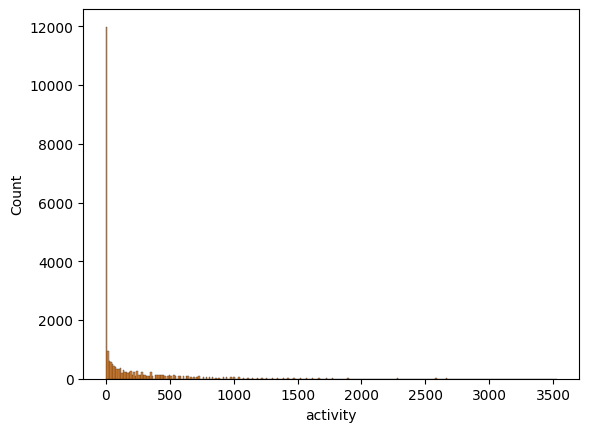

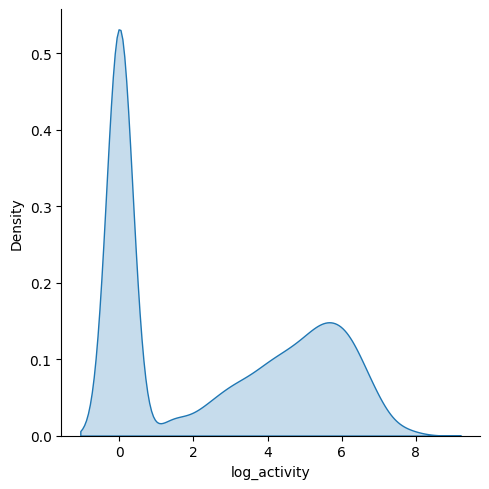

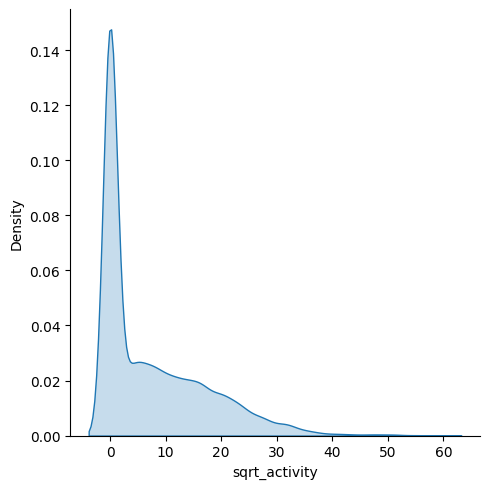

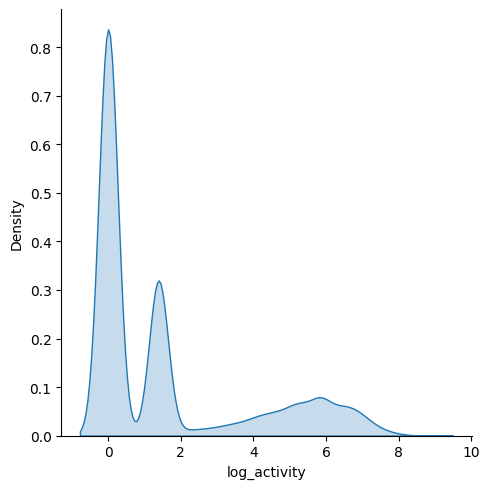

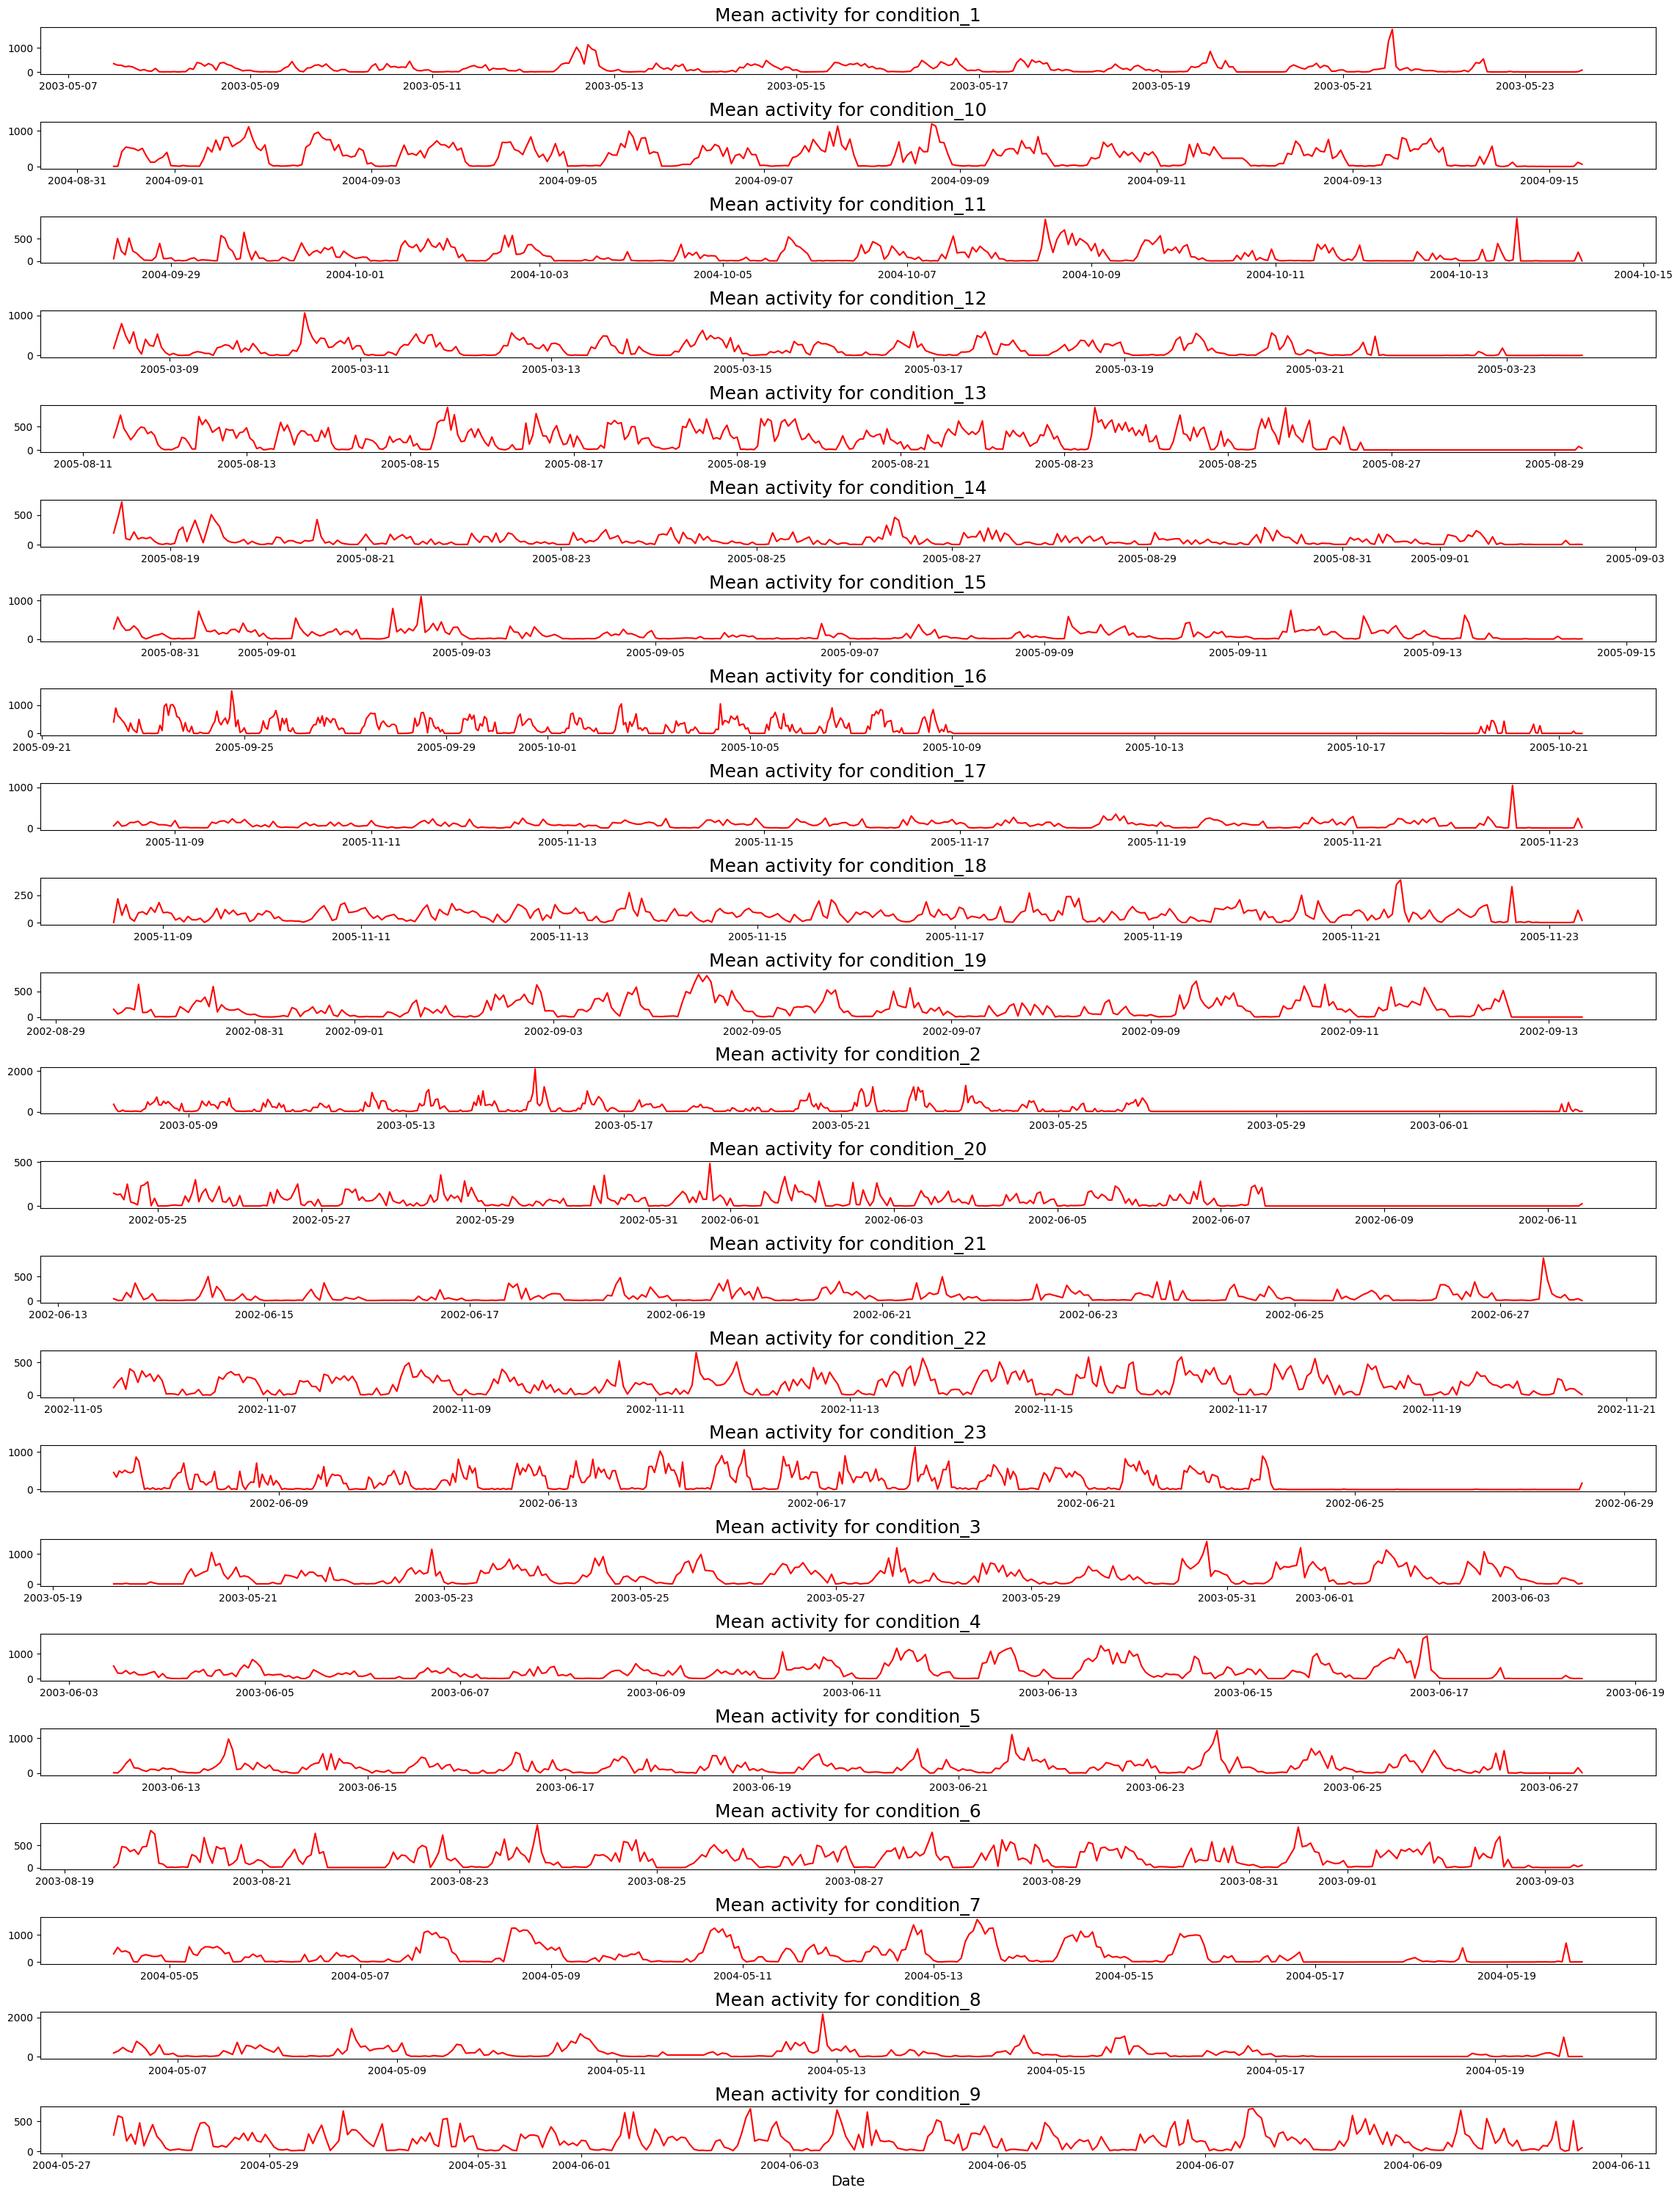

In [80]:
fig, axes = plt.subplots(23, 1, figsize=(23, 30))
cnt = 0
for i in range(23):
    condition = conditions[cnt]
    axes[i].plot(condition.index, condition.mean_activity, color='r')
    axes[i].set_title(f'Mean activity for {condition.source[1]}', fontsize=18)
    cnt += 1
    
plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
fig.savefig('Mean activity of condition group.jpg', dpi=100)
plt.show()

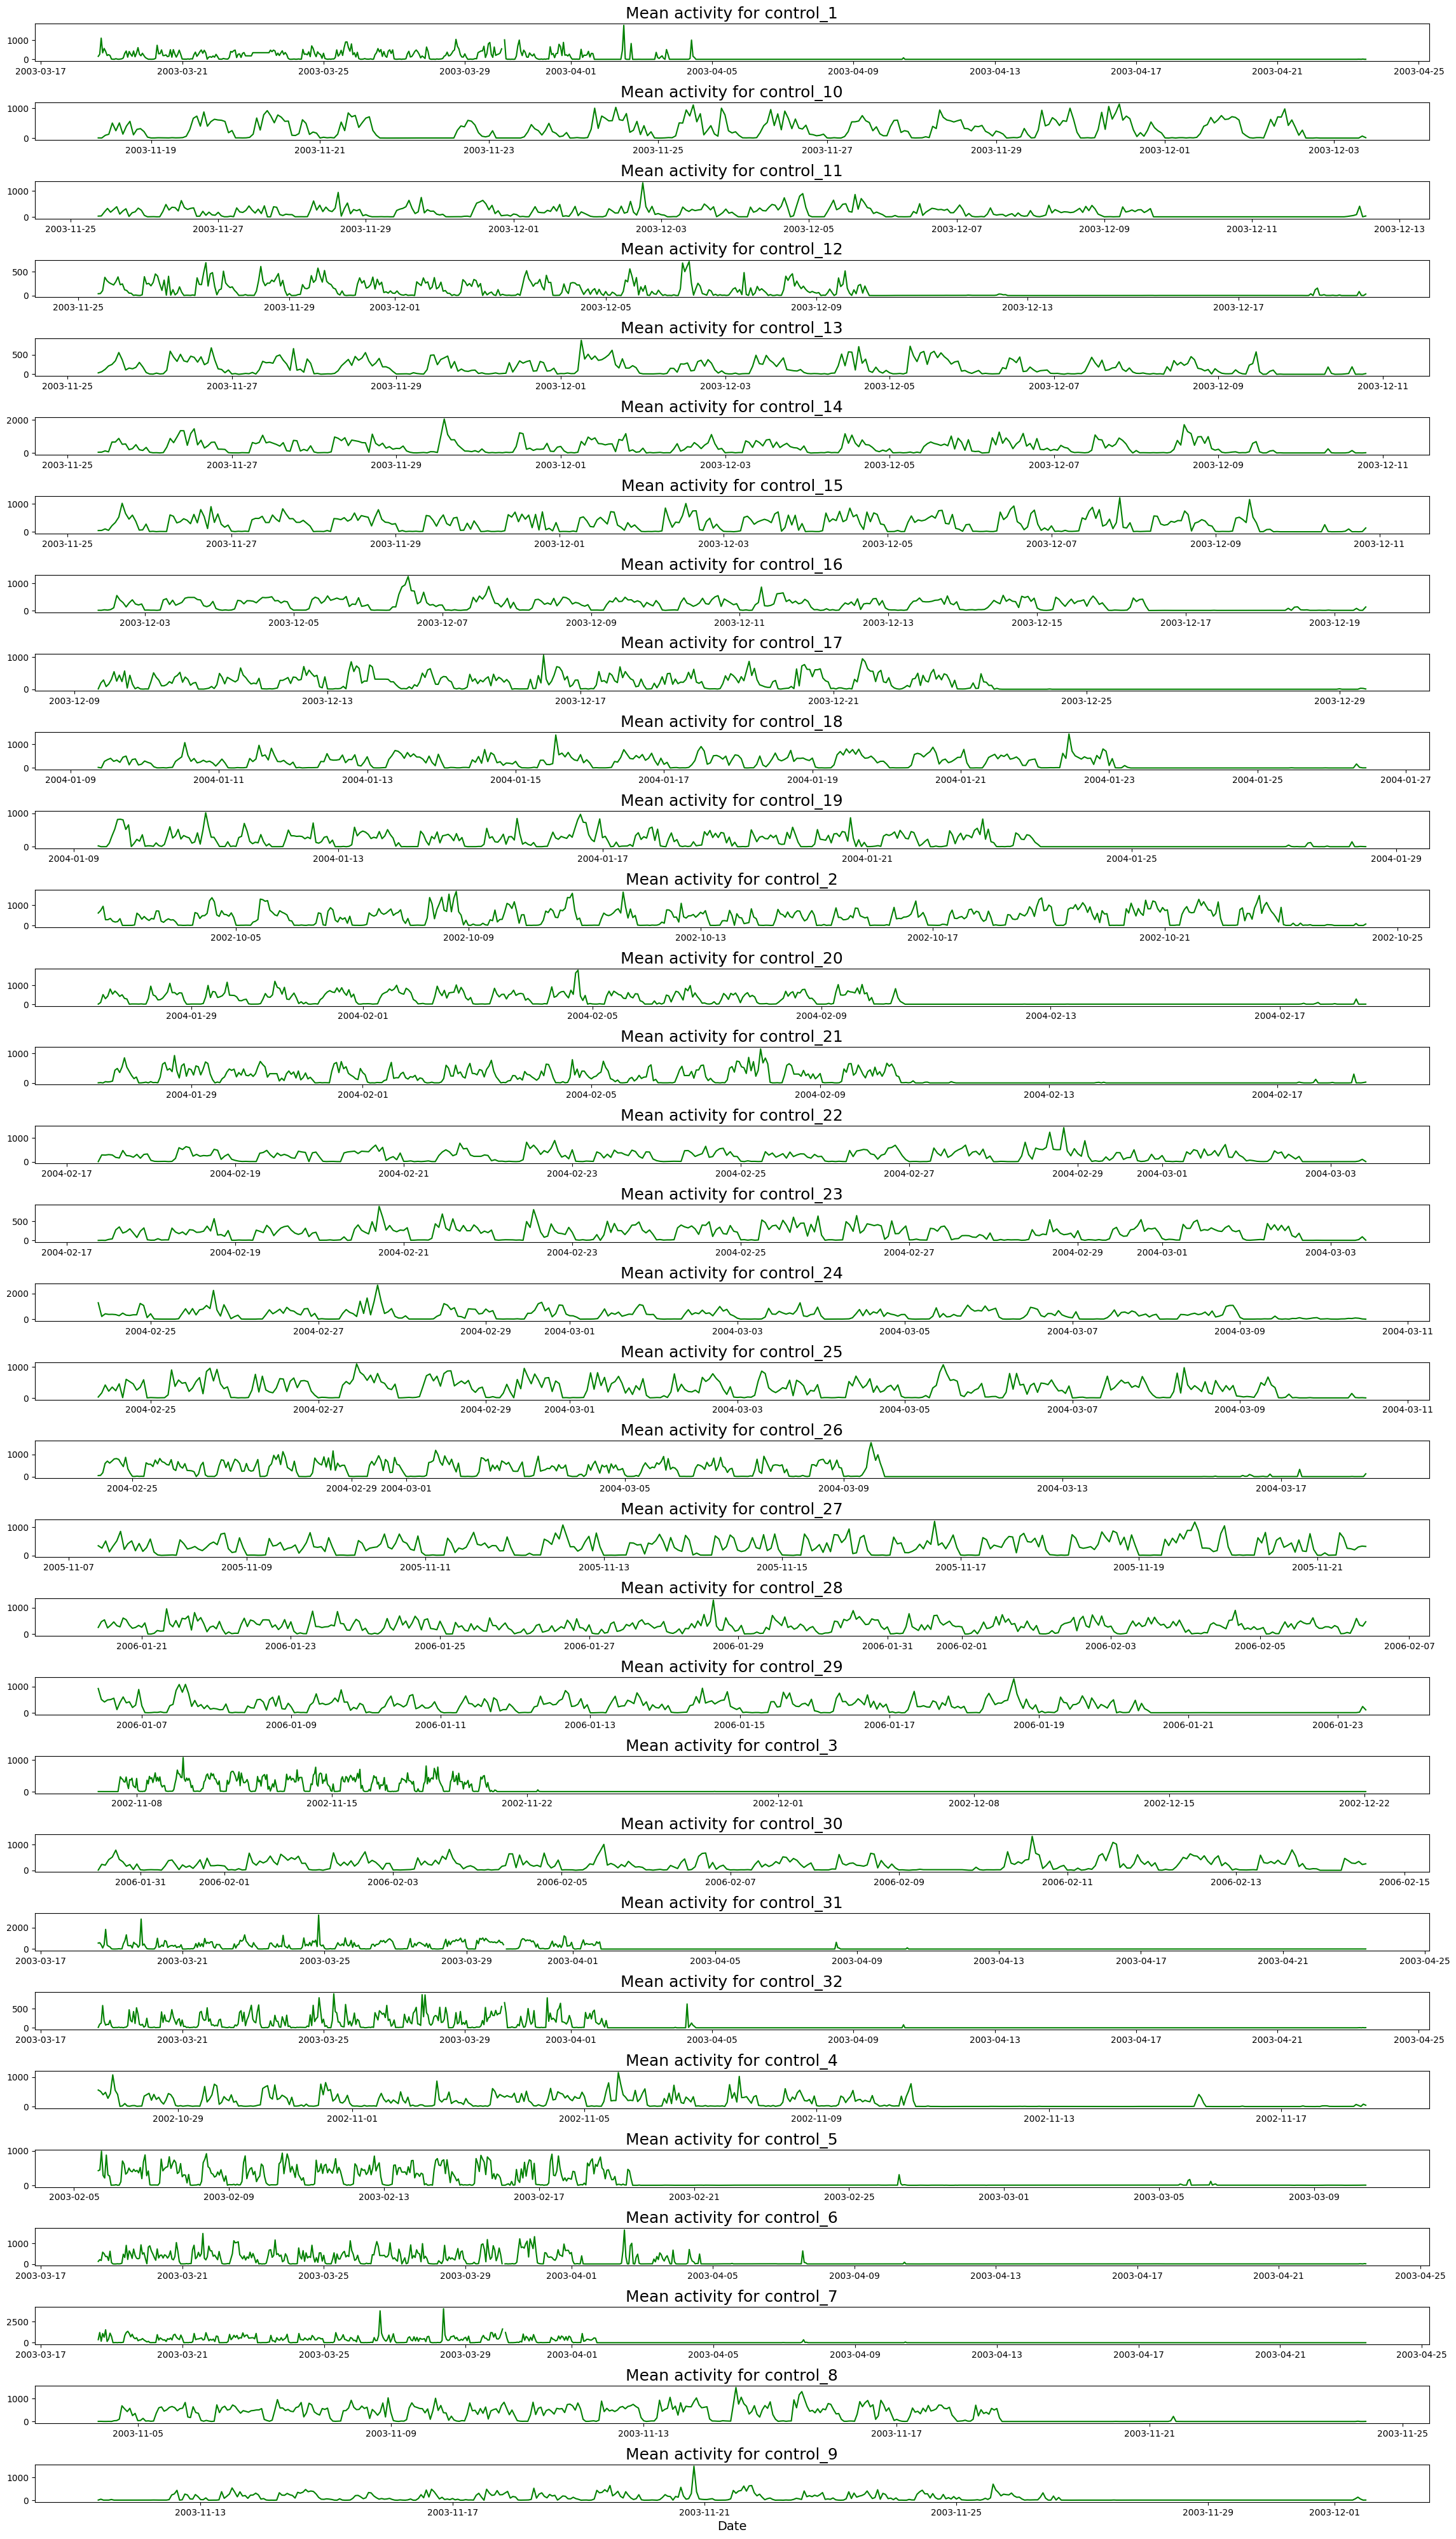

In [81]:
fig, axes = plt.subplots(32, 1, figsize=(23, 40))
cnt = 0
for i in range(32):
    control = controls[cnt]
    axes[i].plot(control.index, control.mean_activity, color='g')
    axes[i].set_title(f'Mean activity for {control.source[1]}', fontsize=18)
    cnt += 1
    
plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
fig.savefig('Mean activity of control group.jpg', dpi=100)
plt.show()

In [82]:
def to_clock(x):
    d = datetime.strptime(f'{x}:00', '%H:%M')
    return d.strftime('%I:%M %p')

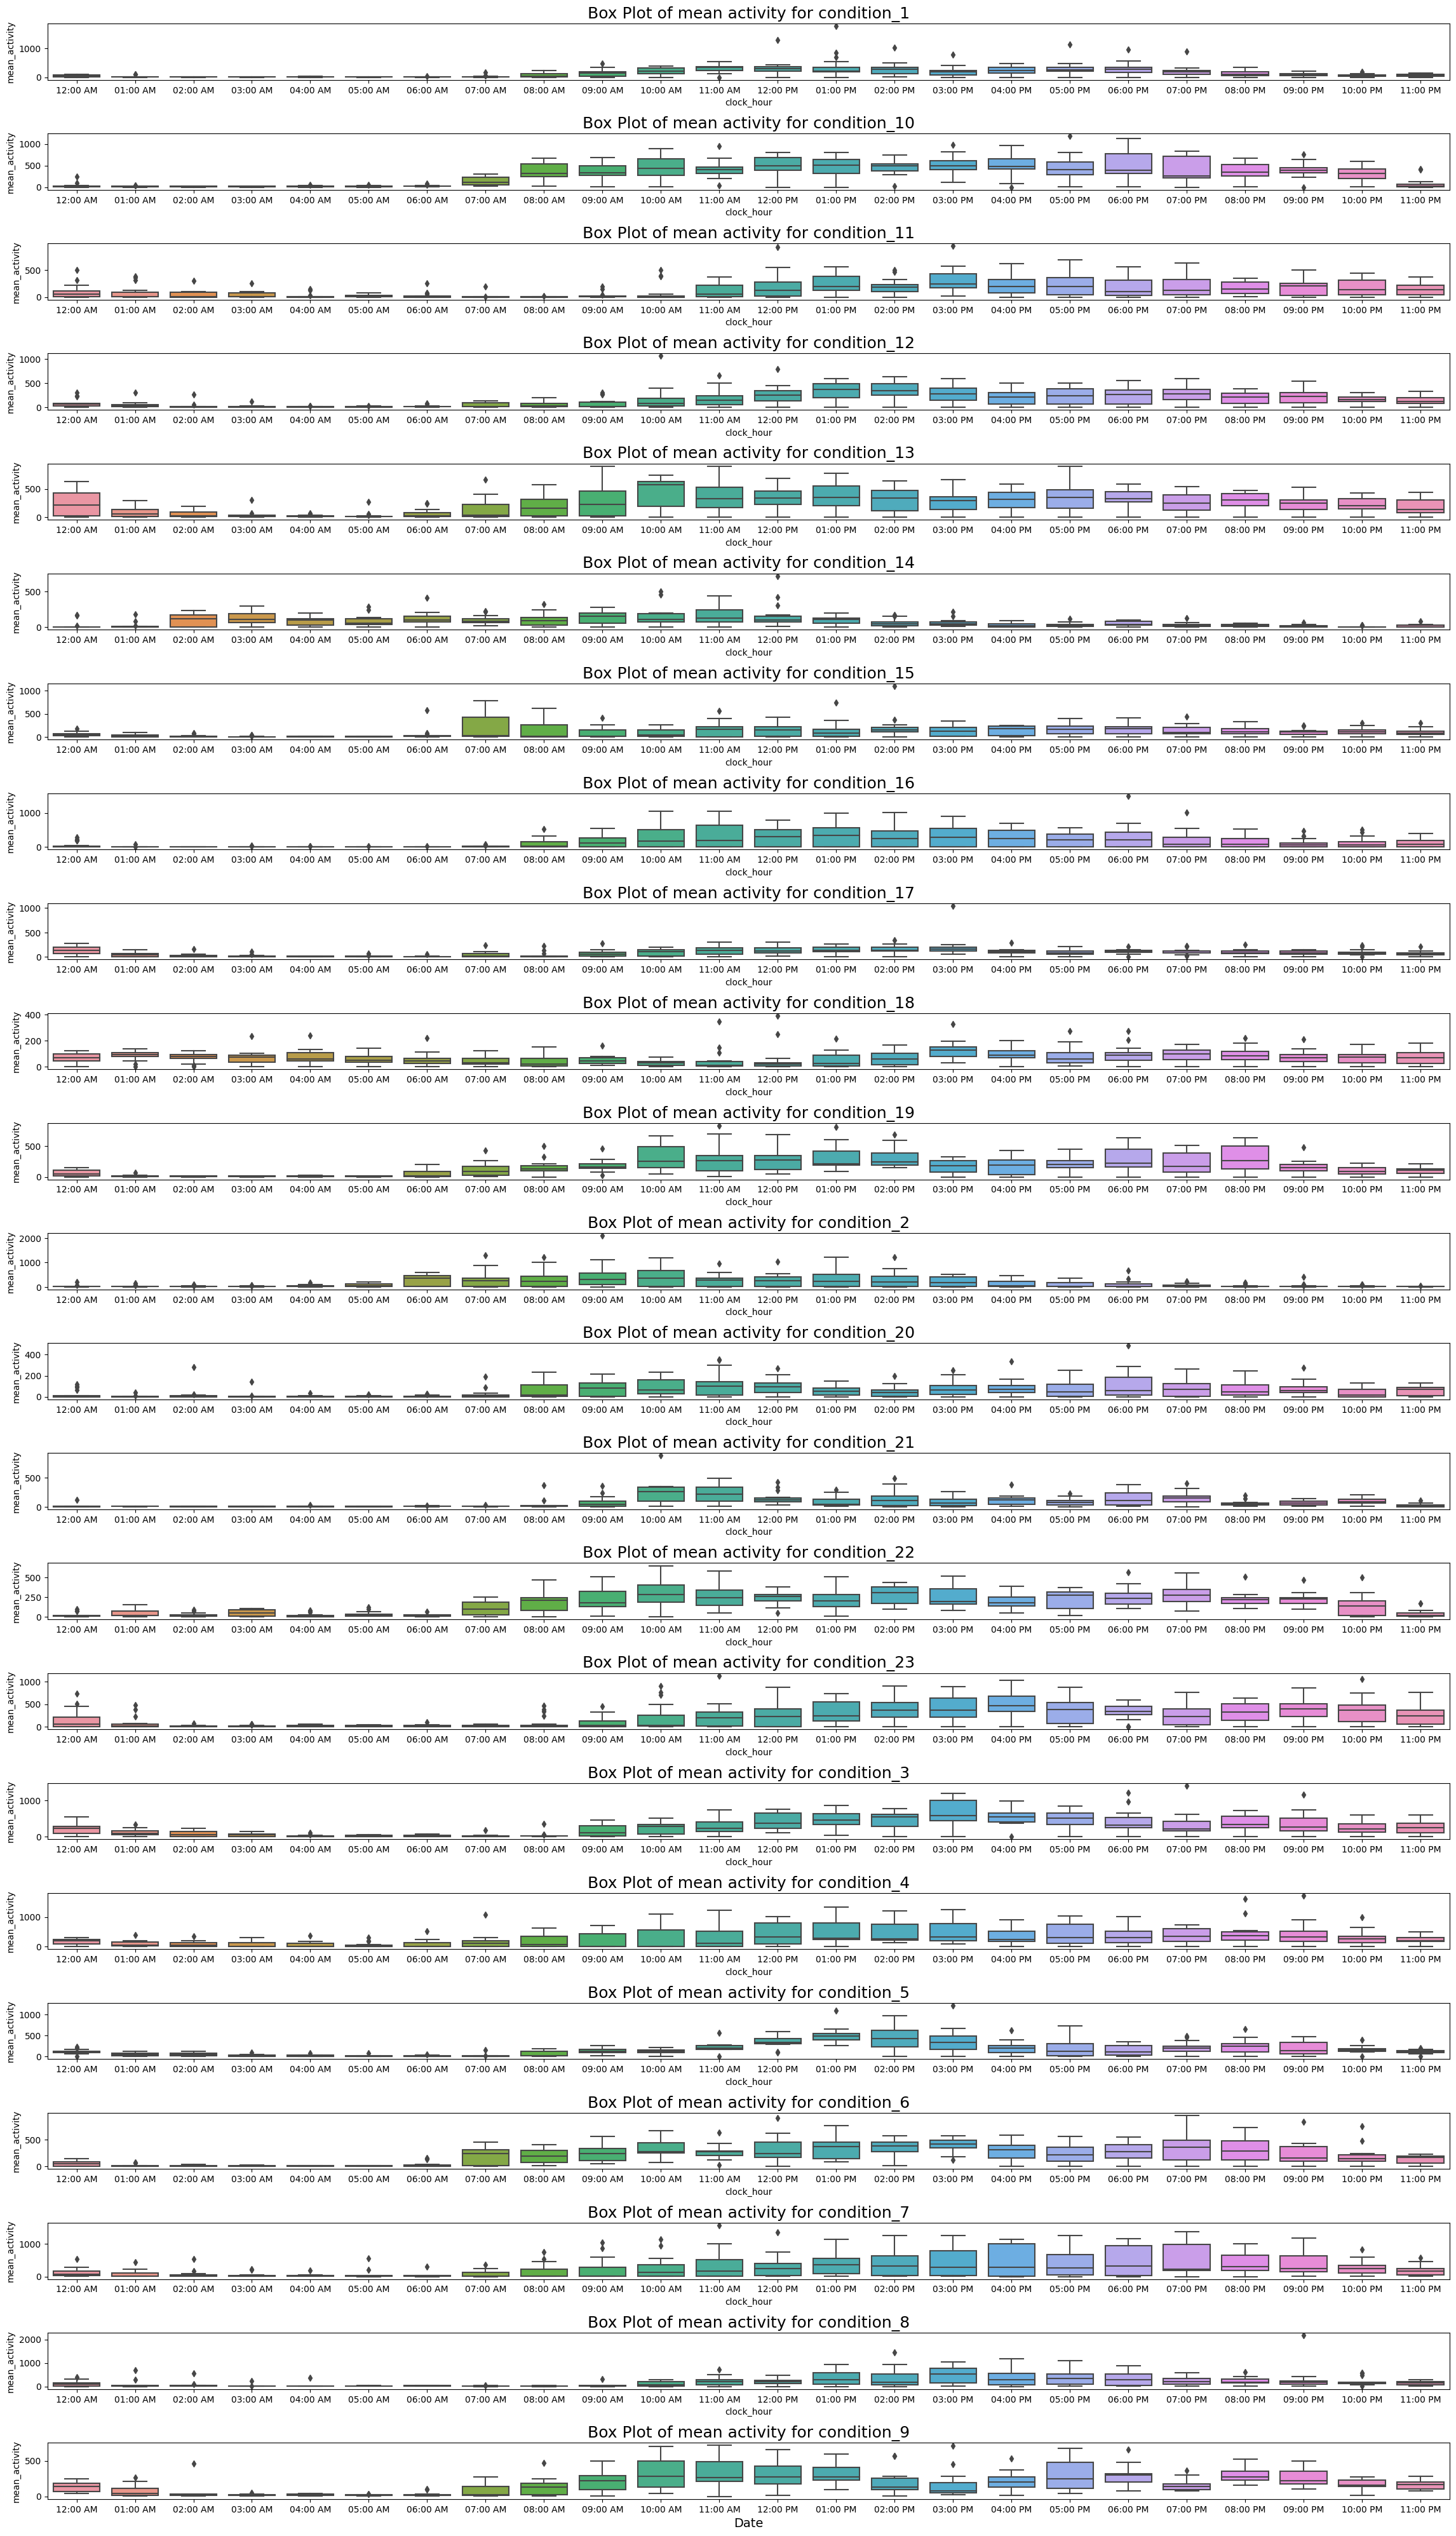

In [83]:
# Draw Plot
fig, axes = plt.subplots(23, 1, figsize=(23, 40))

cnt = 0
for i in range(23):
    df = conditions[i].reset_index()

    # Prepare data
    df['hour'] = [d.hour for d in df.timestamp]
    df = df.sort_values('hour')
    df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
    sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of mean activity for {df.source[1]}', fontsize=18)
    cnt += 1

plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
plt.show()

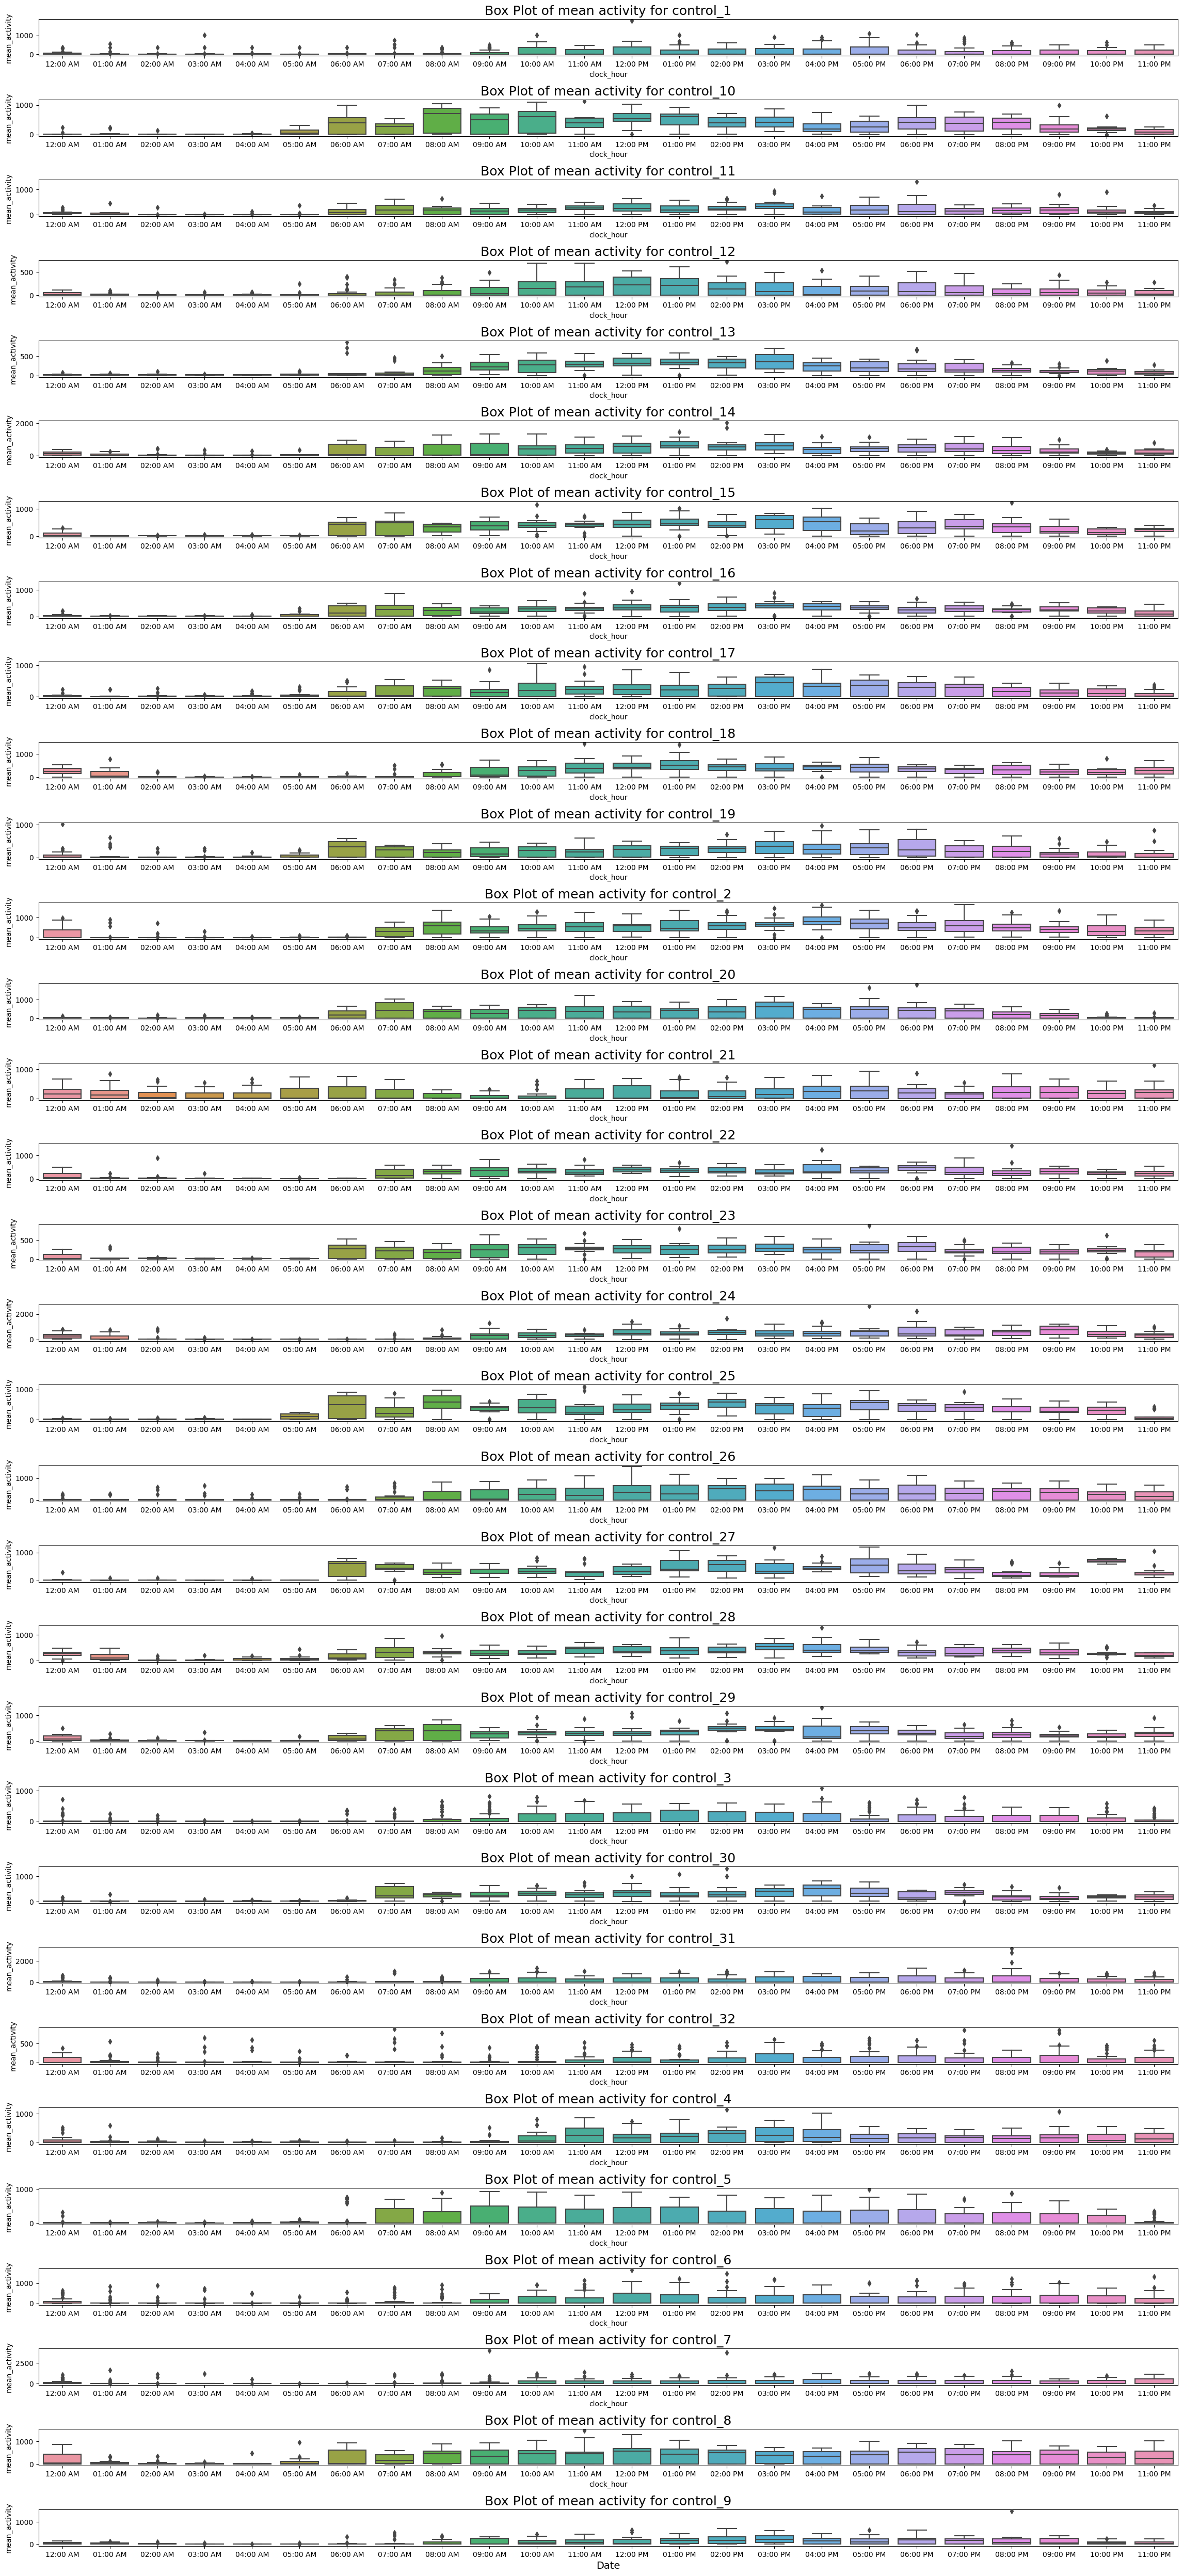

In [84]:
# Draw Plot
fig, axes = plt.subplots(32, 1, figsize=(23, 50))

cnt = 0
for i in range(32):
    df = controls[i].reset_index()

    # Prepare data
    df['hour'] = [d.hour for d in df.timestamp]
    df = df.sort_values('hour')
    df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
    sns.boxplot(x='clock_hour', y='mean_activity', data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of mean activity for {df.source[1]}', fontsize=18)
    cnt += 1

plt.xlabel('Date', fontsize=14)
fig.tight_layout(pad=1.0)
plt.show()


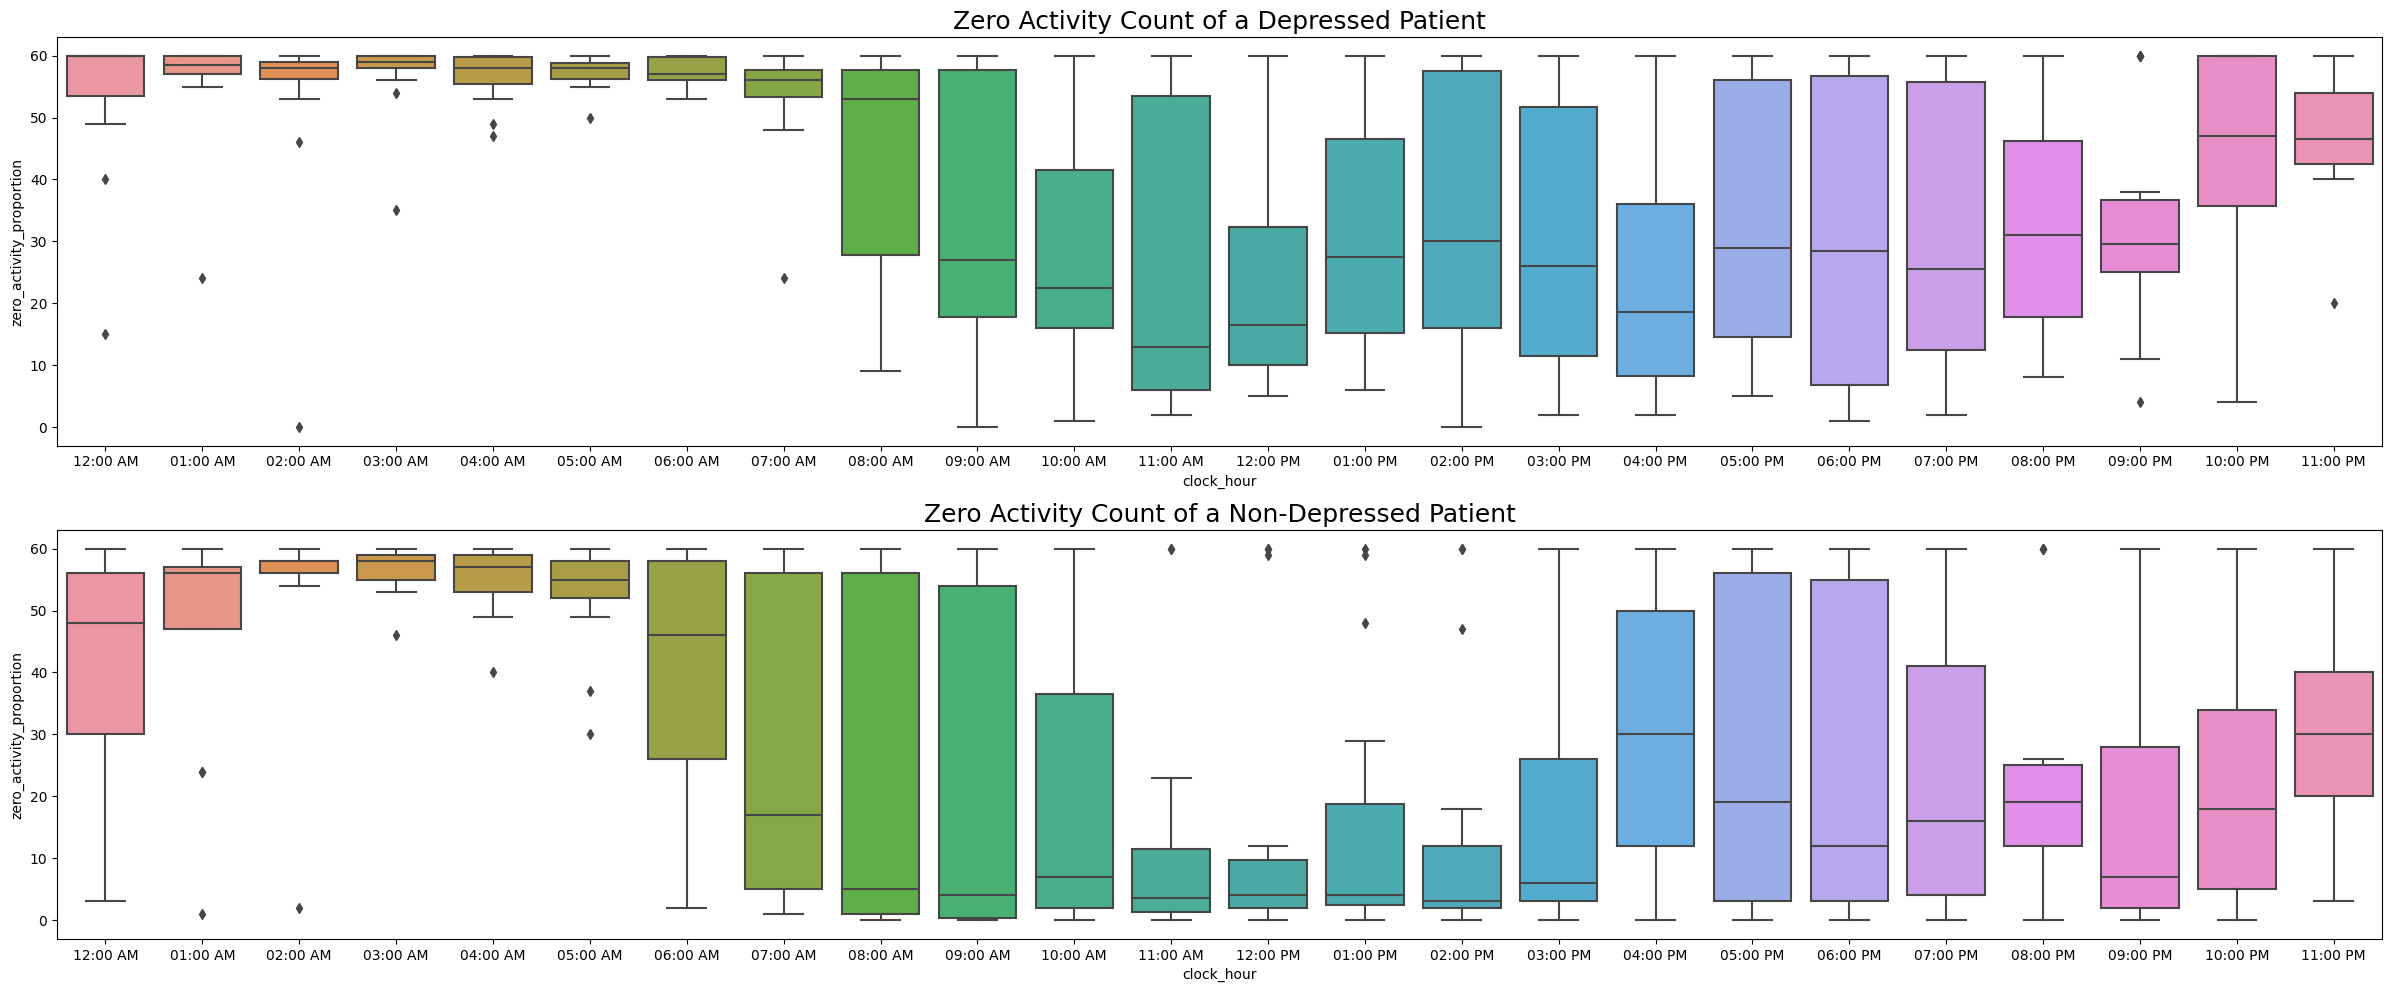

In [85]:
fig, axes = plt.subplots(2, 1, figsize=(24, 10))
df = conditions[12].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
sns.boxplot(x='clock_hour', y='zero_activity_proportion', data=df, ax=axes[0])
axes[0].set_title('Zero Activity Count of a Depressed Patient', fontsize=18)

df = controls[2].reset_index()
df['hour'] = [d.hour for d in df.timestamp]
df = df.sort_values('hour')
df['clock_hour'] = df['hour'].apply(lambda x: to_clock(x))
sns.boxplot(x='clock_hour', y='zero_activity_proportion', data=df, ax=axes[1])
axes[1].set_title('Zero Activity Count of a Non-Depressed Patient', fontsize=18)

fig.tight_layout(pad=1.0)
plt.show()


In [86]:
# Modelling

In [87]:
def nextday(dates):
    for date in dates:
        yield date

In [88]:
def zero_count(series):
    return list(series).count(0)

In [89]:
def extractfeatures(X, date):
    mask = X['date'] == date
    d = {
        'mean_log_activity': X[mask]['log_activity'].mean(),
        'std_log_activity': X[mask]['log_activity'].std(),
        'min_log_activity': X[mask]['log_activity'].min(),
        'max_log_activity': X[mask]['log_activity'].max(),
        'zero_proportion_activity': zero_count(X[mask]['log_activity'])
    }
    return d

In [90]:
class ExtractData(BaseEstimator, TransformerMixin):
    
    def __init__(self, path):
        self.path = path
        self.X = []

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        dirs = os.listdir(self.path)
        
        for filepath in sorted(dirs, key=lambda x: x.split('_')[0]):
            condition = filepath.split('.')[0]
            if filepath.endswith('.csv'):
                X = pd.read_csv(self.path + filepath)
                X['log_activity'] = np.log(X['activity'] + 1)
                dates = X.date.unique()
                
                for date in nextday(dates):
                    d = extractfeatures(X, date)
                    d['source'] = condition
                    self.X.append(d)
                

        return pd.DataFrame(self.X)

In [91]:
e = ExtractData(path='C:/Users/RAKSHA/Desktop/data/condition/')
conditions = e.fit_transform(X=None, y=None)
conditions['state'] = 1

In [92]:
conditions.tail()

mean_log_activity  std_log_activity  min_log_activity  max_log_activity  \
400           2.836361          2.604526               0.0          7.789869   
401           3.317860          2.664783               0.0          7.945201   
402           3.174113          2.653188               0.0          7.664816   
403           2.860525          2.617277               0.0          7.696213   
404           1.648750          2.476757               0.0          7.602900   

     zero_proportion_activity       source  state  
400                       578  condition_9      1  
401                       491  condition_9      1  
402                       505  condition_9      1  
403                       572  condition_9      1  
404                       596  condition_9      1

In [93]:
e = ExtractData(path='C:/Users/RAKSHA/Desktop/data/control/')
controls = e.fit_transform(X=None, y=None)
controls['state'] = 0

In [94]:
full_df = controls.append(conditions, ignore_index=True)
full_df.head()

C:\Users\RAKSHA\AppData\Local\Temp\ipykernel_14836\2945302482.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df = controls.append(conditions, ignore_index=True)


mean_log_activity  std_log_activity  min_log_activity  max_log_activity  \
0           4.269175          2.536873               0.0          7.758761   
1           3.006935          2.636401               0.0          8.038512   
2           3.220895          2.683718               0.0          7.883069   
3           2.737783          2.699849               0.0          7.633854   
4           3.302284          2.641430               0.0          7.789869   

   zero_proportion_activity     source  state  
0                       106  control_1      0  
1                       557  control_1      0  
2                       516  control_1      0  
3                       657  control_1      0  
4                       520  control_1      0

In [95]:
full_df.shape

(1144, 7)

In [96]:
full_df = controls.append(conditions, ignore_index=True)
full_df.head()

C:\Users\RAKSHA\AppData\Local\Temp\ipykernel_14836\2945302482.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df = controls.append(conditions, ignore_index=True)


mean_log_activity  std_log_activity  min_log_activity  max_log_activity  \
0           4.269175          2.536873               0.0          7.758761   
1           3.006935          2.636401               0.0          8.038512   
2           3.220895          2.683718               0.0          7.883069   
3           2.737783          2.699849               0.0          7.633854   
4           3.302284          2.641430               0.0          7.789869   

   zero_proportion_activity     source  state  
0                       106  control_1      0  
1                       557  control_1      0  
2                       516  control_1      0  
3                       657  control_1      0  
4                       520  control_1      0

In [97]:
def custom_train_test_split(train_set, test_set):
    X_train = train_set.drop('label', axis=1)
    y_train = train_set.label
    X_test = test_set.drop('label', axis=1)
    y_test = test_set.label
    
    return X_train, X_test, y_train, y_test

In [98]:
full_df = full_df.sample(frac=1)

In [99]:
class CustomClassifierCV(BaseEstimator, TransformerMixin):
    
    def __init__(self, base_clf):
        self.base_clf = base_clf
    
    def fit(self, X, y=None):
        X['label'] = y
        participants = X.source.unique()
        folds = []
        
        predictions = [] # predicted labels
        actuals = [] # actual labels
            
        for p in participants:
            folds.append(X[X['source'] == p])
        
        for i in range(len(folds)):   
            test_set = folds[i]
            train_fold = [elem for idx , elem in enumerate(folds) if idx != i]
            
            train_set = pd.concat(train_fold)
            X_train, X_test, y_train, y_test = custom_train_test_split(train_set.drop(['source'], axis=1),
                                    test_set.drop(['source'], axis=1))
            
            self.base_clf.fit(X_train, y_train)
            predictions.append(self.predict(X_test))
            actuals.append(test_set.label.iloc[0])
            
        self.score(predictions, actuals)
        
    def predict(self, X):
        predictions = self.base_clf.predict(X)
        ones = predictions.tolist().count(1)
        zeroes = predictions.tolist().count(0)
        
        return 1 if ones > zeroes else 0
    
    def score(self, predictions, actuals):
        print(classification_report(predictions, actuals))

In [100]:
X = full_df.drop(['state'], axis=1)
y = full_df.state

In [101]:
forest = RandomForestClassifier(n_estimators=100)
custom_clfCV = CustomClassifierCV(forest)
custom_clfCV.fit(X, y)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        43
           1       0.39      0.75      0.51        12

    accuracy                           0.69        55
   macro avg       0.65      0.71      0.64        55
weighted avg       0.79      0.69      0.72        55

